## hw4q2

In [231]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt 

In [232]:
with h5py.File('mnist_traindata.hdf5','r') as f:
    xdata_train=np.array(f['xdata'])
    ydata_train=np.array(f['ydata'])
    y_train=np.zeros(len(ydata_train))
    for i in range(len(ydata_train)):
        if np.argmax(ydata_train[i])==2:
            y_train[i]=1
    

with h5py.File('mnist_testdata.hdf5','r') as f:
    xdata_test=np.array(f['xdata'])
    ydata_test=np.array(f['ydata'])
    y_test=np.zeros(len(ydata_test))
    for i in range(len(ydata_test)):
        if np.argmax(ydata_test[i])==2:
            y_test[i]=1

weights=[]
bias=0


In [233]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def binary_log_loss(W,x,w0,y,reg_type=None,lmd=0.1):
    m=x.shape[0]
    z=np.dot(x,W)+w0
    p=sigmoid(z)
    
    loss=-np.sum(y*np.log(p)+(1-y)*np.log(1-p))/m
    
    if reg_type=='l1':
        loss+=(lmd/m)*np.sum(np.abs(W))
    elif reg_type=='l2':
        loss+=(lmd/(2*m))*np.sum(np.square(W))
    
    return loss

In [234]:
def plt_accuracy_loss(loss_train,loss_test,accuracy_train,accuracy_test,learning_rate):
    plt.figure()
    plt.plot(loss_train,label='loss train')
    plt.plot(loss_test,label='loss test')
    plt.xlabel('Iteration Number')
    plt.ylabel('Log loss')
    plt.title(f'learning rate{learning_rate}:log loss')
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(accuracy_train,label='accuracy train')
    plt.plot(accuracy_test,label='accuracy test')
    plt.xlabel('Iteration Number')
    plt.ylabel('accuracy')
    plt.title(f'learning rate{learning_rate}:Accuracy')
    plt.legend()
    plt.show()

In [235]:
def print_table(iter_stop,accuracy_train,loss_train,accuracy_test,loss_test,learning_rate):
    data={
        'Learning rate':learning_rate,
        'Iter':iter_stop,
        'Accuracy train':accuracy_train,
        'Loss train':loss_train,
        'Accuracy test':accuracy_test,
        'Loss test':loss_test,
    }
    df=pd.DataFrame(data)
    print(df)

In [236]:
def gradient_descent(W,w0,x_train,x_test,y_train,y_test,learning_rate,max_iter,reg_type=None,lmd=0.1):
    m=x_train.shape[0]
    loss_history_train=[]
    loss_history_test=[]
    accuracy_history_train=[]
    accuracy_history_test=[]
    threshold=1e-4
    pre_loss_train=0
    
    for iter in range(max_iter):
        z_train=np.dot(x_train,W)+w0
        p_train=sigmoid(z_train)

        #draw initial W w0 --- loss and accuracy of test
        if iter==0:
            loss_train=binary_log_loss(W,x_train,w0,y_train,reg_type,lmd)
            loss_history_train.append(loss_train)
            loss_test=binary_log_loss(W,x_test,w0,y_test,reg_type,lmd)
            loss_history_test.append(loss_test)
            z_test=np.dot(x_test,W)+w0
            p_test=sigmoid(z_test)
            predictions_test=np.where(p_test>=0.5,1,0)
            accuracy_test=np.mean(predictions_test==y_test)
            accuracy_history_test.append(accuracy_test)

        dw=np.dot(x_train.T,(p_train-y_train))/m
        db=np.sum(p_train-y_train)/m
        
        if reg_type=='l1':
            dw+=(lmd/m)*np.sign(W)
        elif reg_type=='l2':
            dw+=(lmd/m)*W
        
        W-=learning_rate*dw
        w0-=learning_rate*db

        loss_train=binary_log_loss(W,x_train,w0,y_train,reg_type,lmd)
        loss_history_train.append(loss_train)
        loss_test=binary_log_loss(W,x_test,w0,y_test,reg_type,lmd)
        loss_history_test.append(loss_test)

        predictions_train=np.where(p_train>=0.5,1,0)
        accuracy_train=np.mean(predictions_train==y_train)
        accuracy_history_train.append(accuracy_train)
        
        z_test=np.dot(x_test,W)+w0
        p_test=sigmoid(z_test)
        predictions_test=np.where(p_test>=0.5,1,0)
        accuracy_test=np.mean(predictions_test==y_test)
        accuracy_history_test.append(accuracy_test)

        #print(loss_train-pre_loss_train)
        if np.abs(loss_train-pre_loss_train)<threshold:
            print(f"Model converged at iter {iter}")
            break
        pre_loss_train=loss_train
        
    plt_accuracy_loss(loss_history_train,loss_history_test,accuracy_history_train,accuracy_history_test,learning_rate)
    return W,w0,loss_train,loss_test,accuracy_train,accuracy_test,iter

In [237]:
def logistic_regression(x_train,x_test,y_train,y_test,max_iter,learning_rates,reg_type=None,lmd=0.1):
    iter_stop=[]
    final_accuracy_train=[]
    final_loss_train=[]
    final_accuracy_test=[]
    final_loss_test=[]
    for learning_rate in learning_rates:
        n=x_train.shape[1]
        W=np.zeros(n)
        w0=0
        W,w0,loss_train,loss_test,accuracy_train,accuracy_test,iter=gradient_descent(W,w0,x_train,x_test,y_train,y_test,learning_rate,max_iter,reg_type,lmd)
        iter_stop.append(iter)
        final_accuracy_train.append(accuracy_train)
        final_loss_train.append(loss_test)
        final_accuracy_test.append(accuracy_test)
        final_loss_test.append(loss_train)
    print_table(iter_stop,final_accuracy_train,final_loss_train,final_accuracy_test,final_loss_test,learning_rates)

In [238]:
learning_rates=[0.01,0.1,1,2,3]
max_iter=1000
lmd=0.01

### No regulariser

Model converged at iter 550


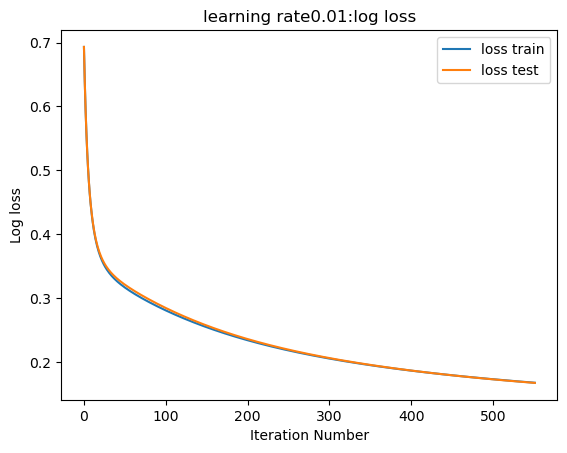

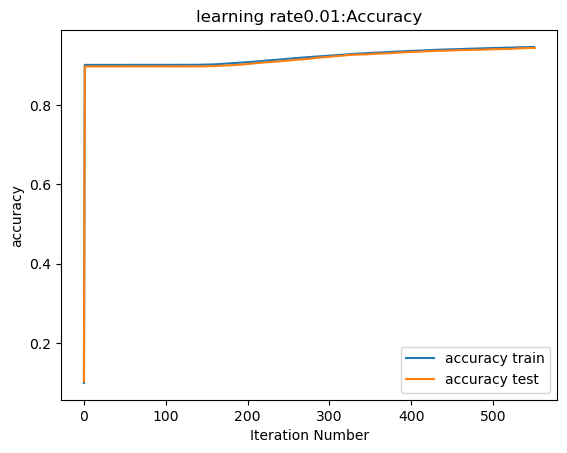

Model converged at iter 246


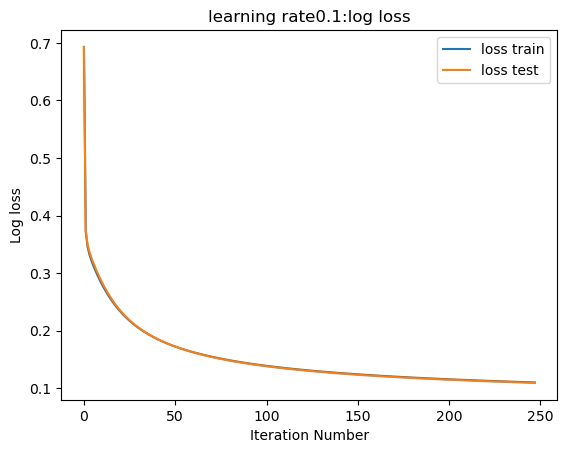

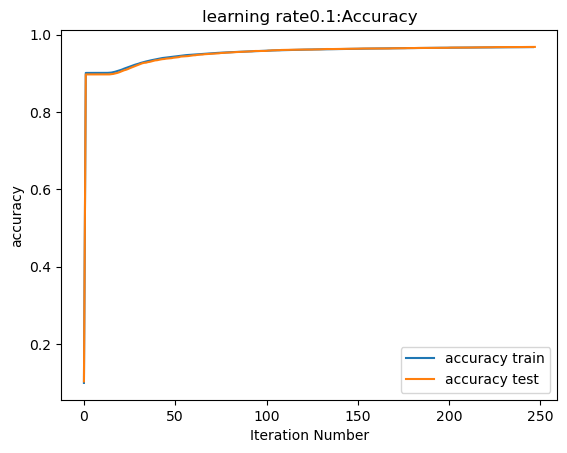

Model converged at iter 109


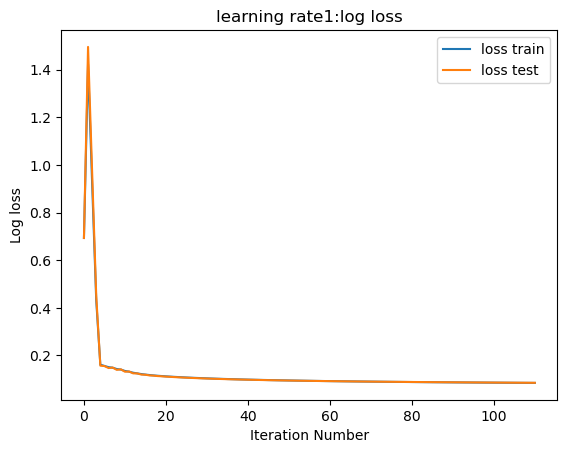

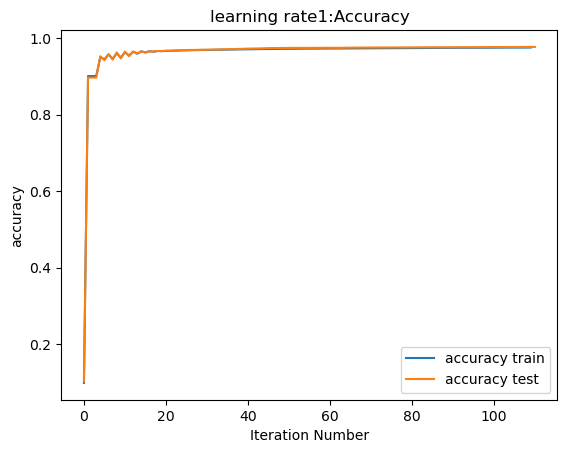

Model converged at iter 80


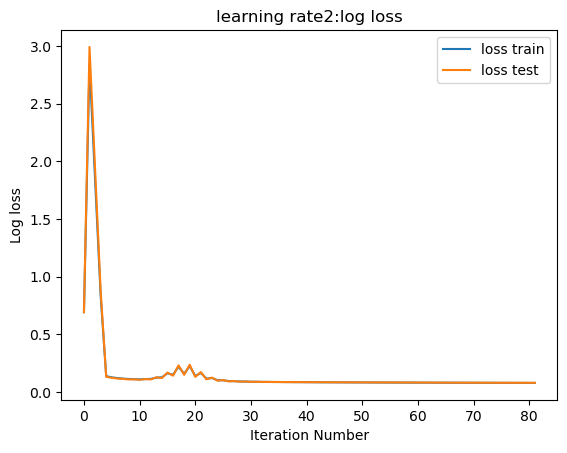

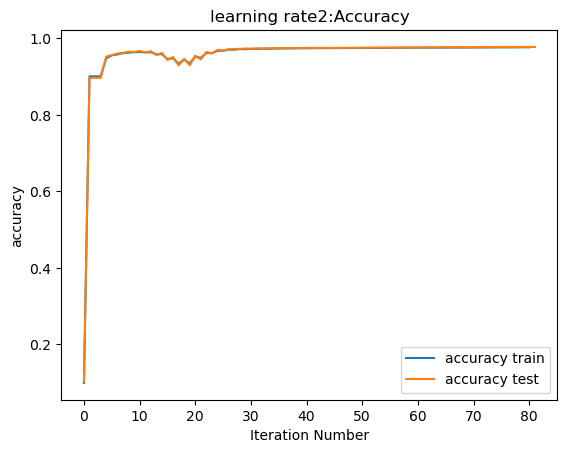

Model converged at iter 47


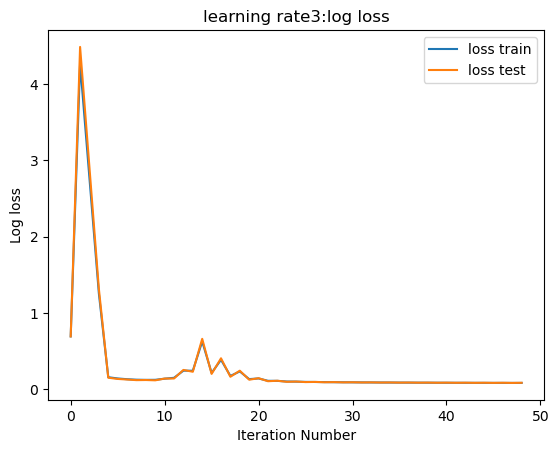

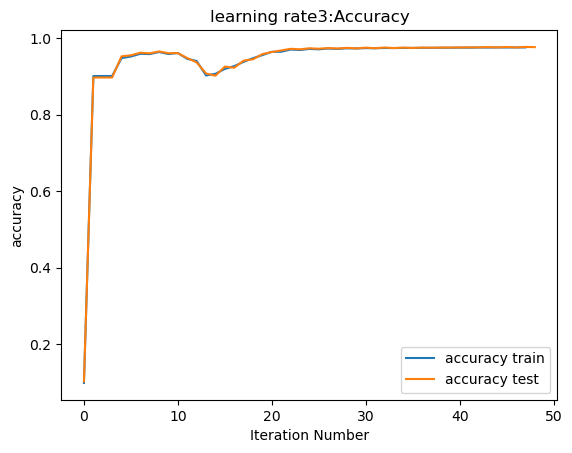

   Learning rate  Iter  Accuracy train  Loss train  Accuracy test  Loss test
0           0.01   550        0.946033    0.167011         0.9435   0.167308
1           0.10   246        0.967400    0.108955         0.9679   0.109749
2           1.00   109        0.975217    0.085216         0.9768   0.084703
3           2.00    80        0.976650    0.081529         0.9775   0.080554
4           3.00    47        0.975333    0.085829         0.9761   0.083927


In [239]:
logistic_regression(xdata_train,xdata_test,y_train,y_test,max_iter,learning_rates,lmd)

### L1 regularization

Model converged at iter 550


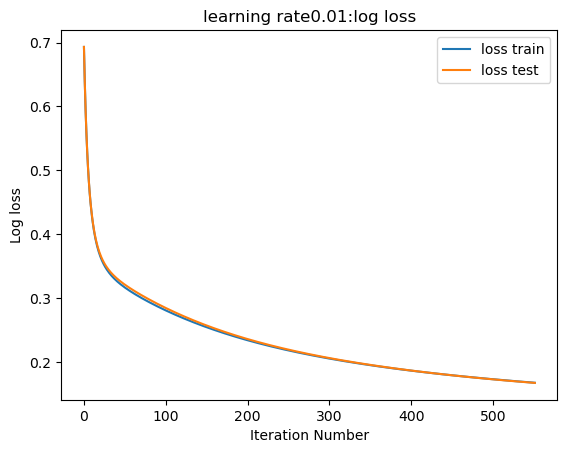

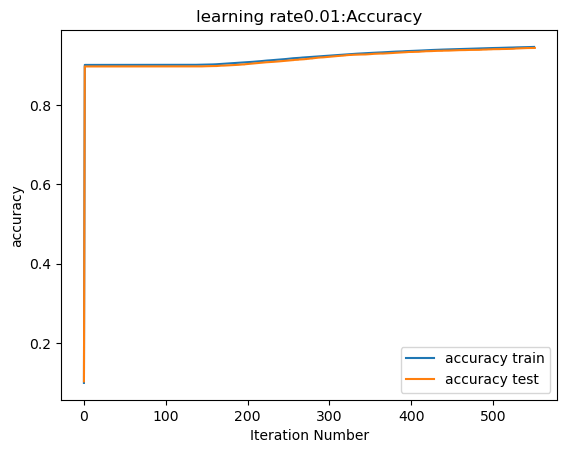

Model converged at iter 246


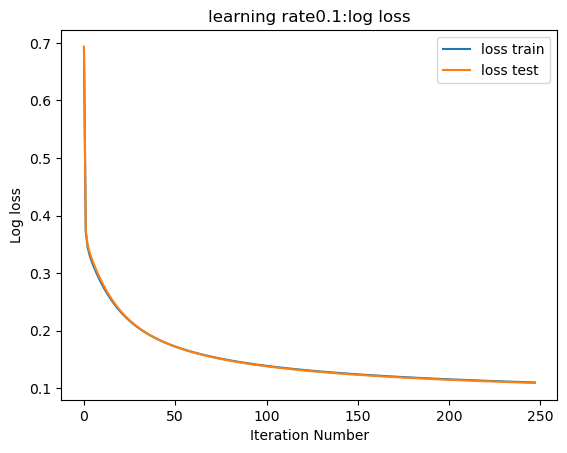

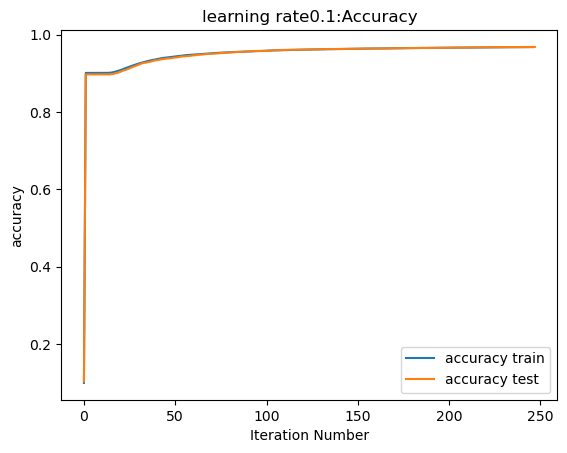

Model converged at iter 109


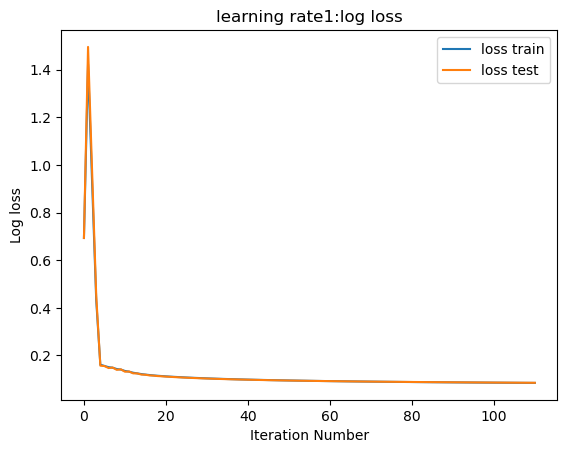

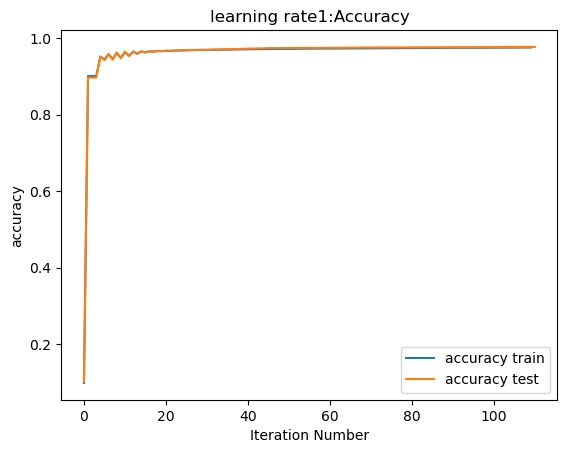

Model converged at iter 80


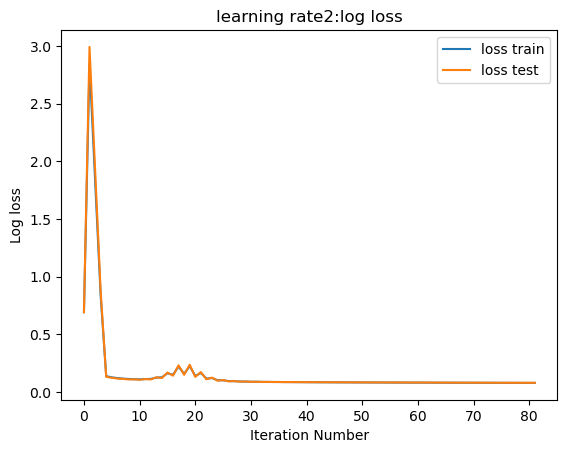

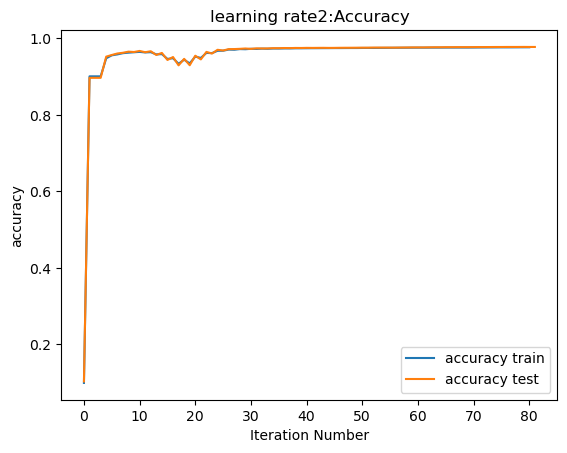

Model converged at iter 47


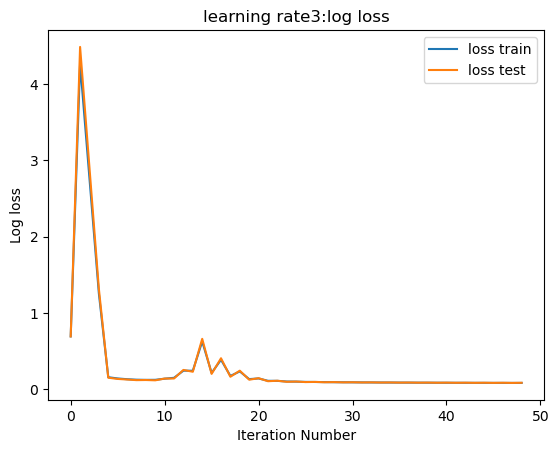

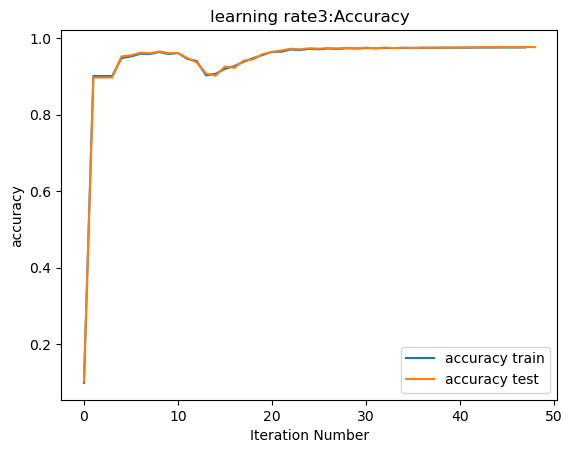

   Learning rate  Iter  Accuracy train  Loss train  Accuracy test  Loss test
0           0.01   550        0.946033    0.167029         0.9435   0.167312
1           0.10   246        0.967400    0.108989         0.9679   0.109755
2           1.00   109        0.975217    0.085270         0.9768   0.084714
3           2.00    80        0.976650    0.081593         0.9775   0.080565
4           3.00    47        0.975333    0.085902         0.9761   0.083939


In [240]:
logistic_regression(xdata_train,xdata_test,y_train,y_test,max_iter,learning_rates,'l1',lmd)

### L2 regularization

Model converged at iter 550


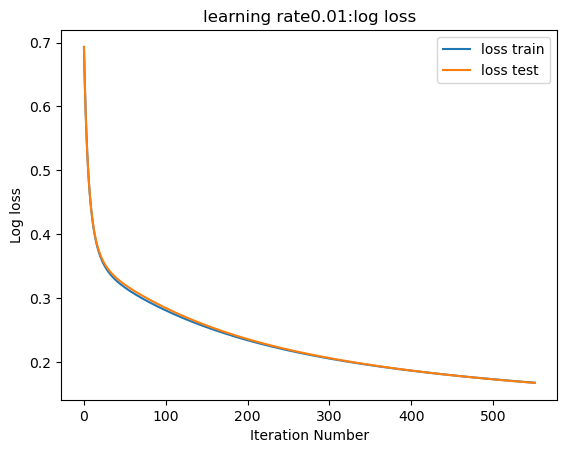

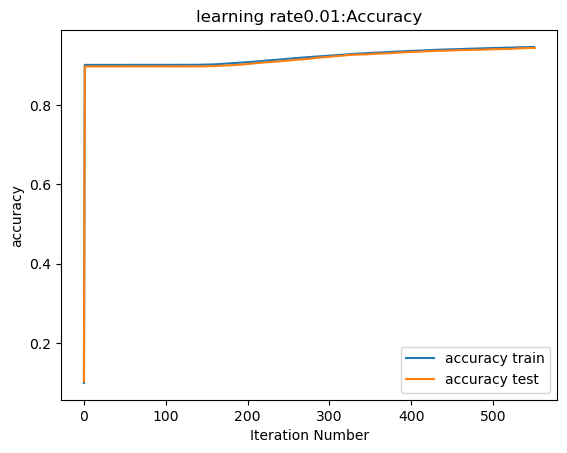

Model converged at iter 246


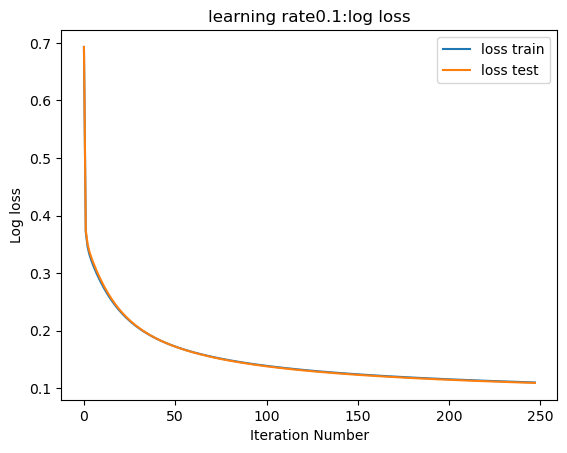

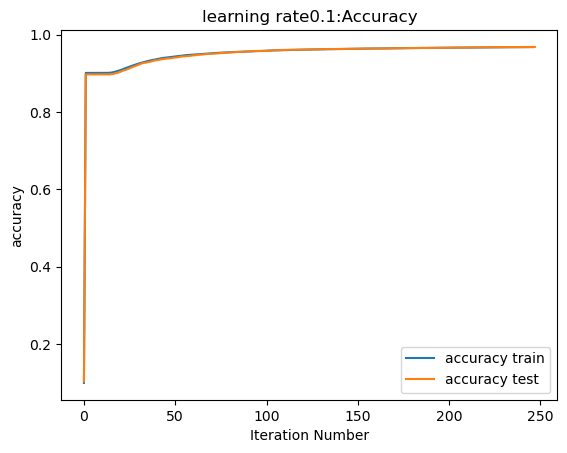

Model converged at iter 109


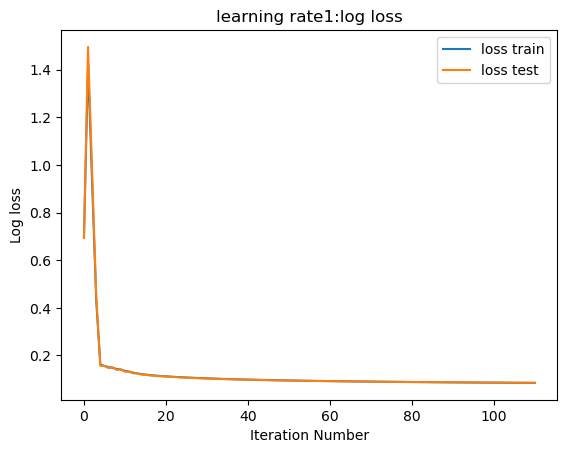

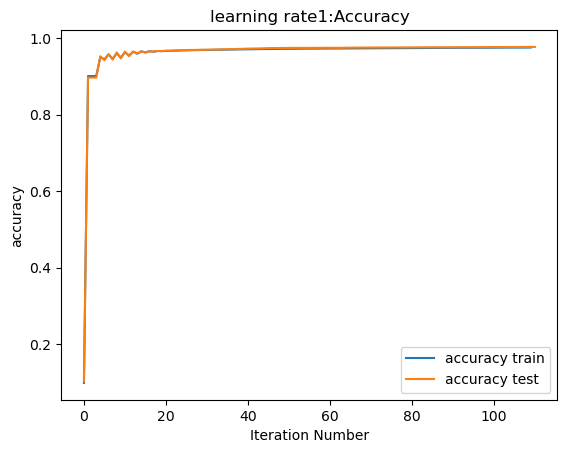

Model converged at iter 80


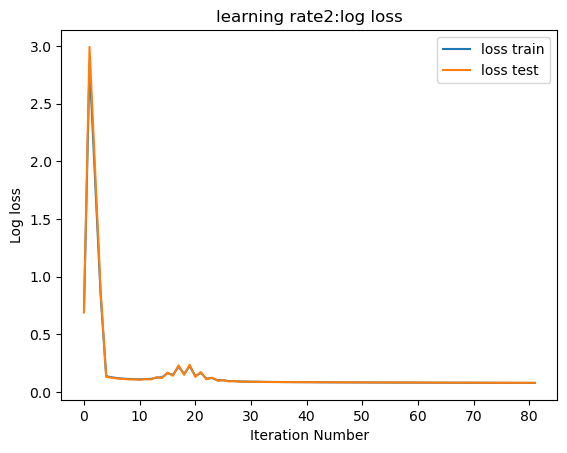

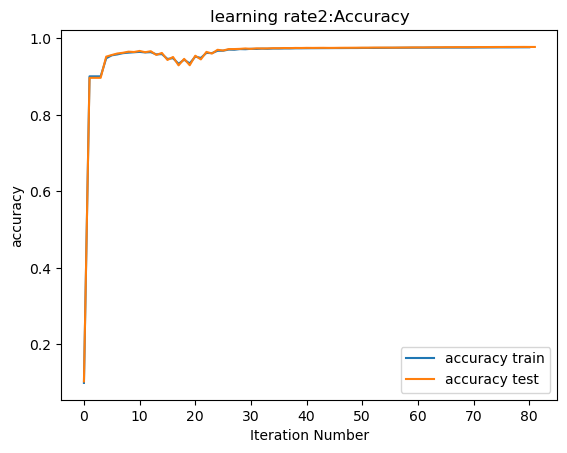

Model converged at iter 47


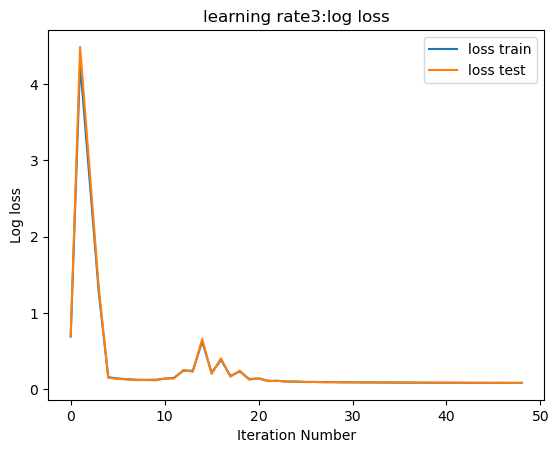

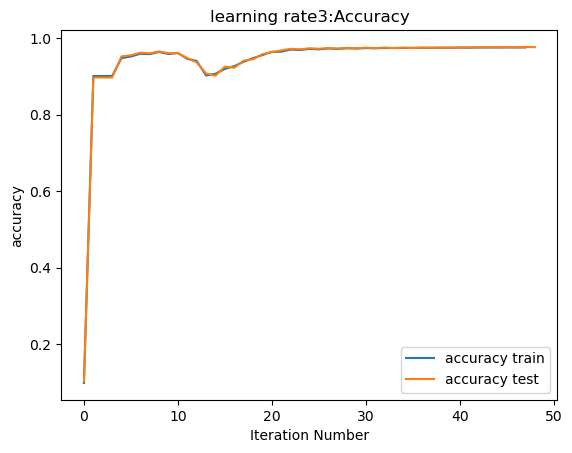

   Learning rate  Iter  Accuracy train  Loss train  Accuracy test  Loss test
0           0.01   550        0.946033    0.167011         0.9435   0.167308
1           0.10   246        0.967400    0.108957         0.9679   0.109749
2           1.00   109        0.975217    0.085221         0.9768   0.084704
3           2.00    80        0.976650    0.081536         0.9775   0.080555
4           3.00    47        0.975333    0.085837         0.9761   0.083927


In [241]:
logistic_regression(xdata_train,xdata_test,y_train,y_test,max_iter,learning_rates,'l2',lmd)

### Saving weights and bias to hdf5

In [250]:
#pick a best result
def gradient_descent1(W,w0,x_train,x_test,y_train,y_test,learning_rate,max_iter):
    m=x_train.shape[0]
    threshold=1e-4
    pre_loss_train=0
    
    for iter in range(max_iter):
        z_train=np.dot(x_train,W)+w0
        p_train=sigmoid(z_train)

        dw=np.dot(x_train.T,(p_train-y_train))/m
        db=np.sum(p_train-y_train)/m
        
        W-=learning_rate*dw
        w0-=learning_rate*db

        loss_train=binary_log_loss(W,x_train,w0,y_train)
        
        z_test=np.dot(x_test,W)+w0
        p_test=sigmoid(z_test)
        predictions_test=np.where(p_test>=0.5,1,0)
        accuracy_test=np.mean(predictions_test==y_test)

        if np.abs(loss_train-pre_loss_train)<threshold:
            #print(f"Model converged at iter {iter}")
            break
        pre_loss_train=loss_train
    return W,w0

n=xdata_train.shape[1]
W=np.zeros(n)
w0=0
W,w0=gradient_descent1(W,w0,xdata_train,xdata_test,y_train,y_test,2,max_iter)

In [251]:
outFile='hw4q2_wb.hd5'
weight_length=784
assert W.shape[0]==weight_length, 'Error: the length is incorrect'

with h5py.File(outFile, 'w') as hf:
    hf.create_dataset('w', data = np.asarray(W))
    hf.create_dataset('b', data = np.asarray(w0))

with h5py.File(outFile,'r') as hf:
    w_copy=hf['w'][:]

np.testing.assert_array_equal(W,w_copy)

#### i. How did you determine a learning rate? What values did you try? What was your final value?
I set a list of learning rates (0.01,0.1,1,1.5,2), let the training model running over each of them. And then comparing the final train and test accuracies in a table to see which one performed the best
#### ii. Describe the method you used to establish model convergence.
I have set a max number of iterations (= 1000). And if the loss no longer change significantly (the change between two successive iterations less than thethreshold), the iteration stops.
#### iii. What regularizers did you try? Specifically, how did each impact your model or improve its performance?
I tried no regulariser, L1 and L2 regularisers. However, there was no significant difference in the results among the three methods, possibly because there was no over-fitting
#### iv. Plot log-loss (i.e., learning curve) of the training set and test set on the same figure. On a separate figure plot the accuracy against iteration number of your model on the training set and test set. Plot each as a function of the iteration number.
Plots have been given above.
#### v. Clasify each input to the binary output “digit is a 2” using a 0.5 threshold. Compute the final loss and final accuracy for both your training set and test set.
The data is given in the table above.